In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the data
# Ensure the file name matches your download exactly
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# 2. Fix the "TotalCharges" Trap
# Some values are just empty spaces " ", so we force them to be numbers
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# 3. Drop the few rows (about 11) that had empty TotalCharges
df.dropna(subset=['TotalCharges'], inplace=True)

print("--- Data Loaded and Sanitized! ---")
display(df.head())

--- Data Loaded and Sanitized! ---


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
# Convert Churn column to a simple 1 (Yes) or 0 (No) for math
df['Churn_Numeric'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Calculate the official Churn Rate
total_customers = len(df)
churned_customers = df[df['Churn'] == 'Yes'].shape[0]
churn_rate = (churned_customers / total_customers) * 100

print(f"Total Customers in Dataset: {total_customers}")
print(f"Overall Churn Rate: {churn_rate:.2f}%")

Total Customers in Dataset: 7032
Overall Churn Rate: 26.58%


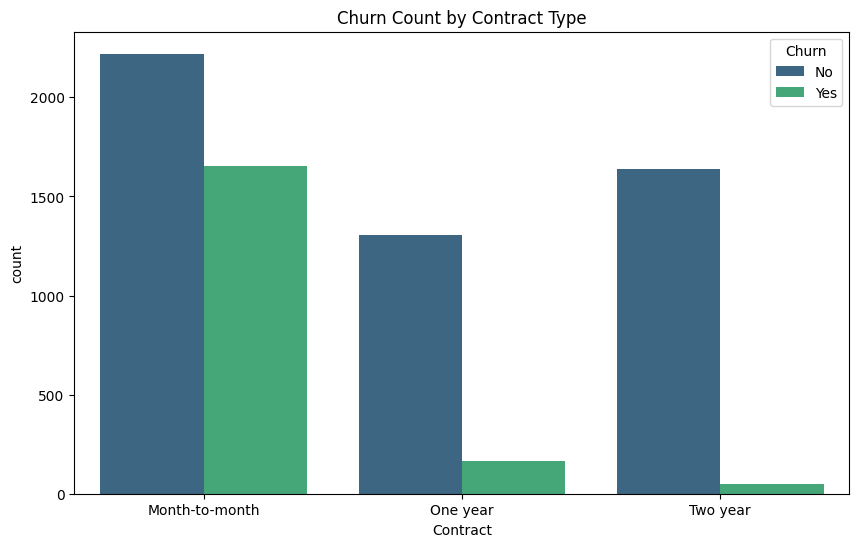

--- Churn % by Contract Type ---
Churn                  No        Yes
Contract                            
Month-to-month  57.290323  42.709677
One year        88.722826  11.277174
Two year        97.151335   2.848665


In [3]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Contract', hue='Churn', palette='viridis')
plt.title('Churn Count by Contract Type')
plt.show()

# Exact percentage breakdown
contract_churn = df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack() * 100
print("--- Churn % by Contract Type ---")
print(contract_churn)

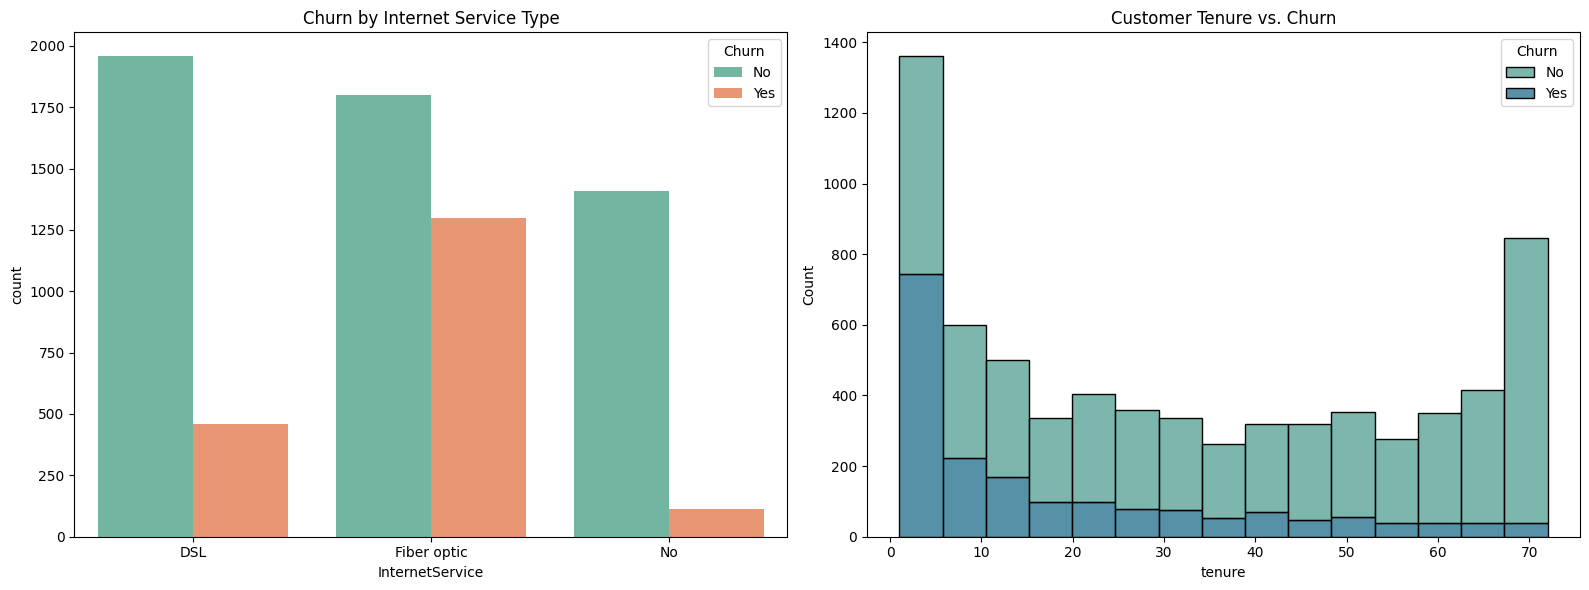

In [4]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. Churn by Internet Service Type
sns.countplot(data=df, x='InternetService', hue='Churn', ax=axes[0], palette='Set2')
axes[0].set_title('Churn by Internet Service Type')

# 2. Churn by Tenure (How long they stay)
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', ax=axes[1], palette='crest')
axes[1].set_title('Customer Tenure vs. Churn')

plt.tight_layout()
plt.show()

In [5]:
# Calculate simple Average Revenue Per User (ARPU)
arpu = df['MonthlyCharges'].mean()

# Calculate Average Tenure (in months) for those who churned
avg_tenure_churned = df[df['Churn'] == 'Yes']['tenure'].mean()

# Estimated Lifetime Value (LTV) lost per churned customer
ltv_loss = arpu * avg_tenure_churned

print(f"Average Monthly Revenue per User: ${arpu:.2f}")
print(f"Average months stayed before churning: {avg_tenure_churned:.1f} months")
print(f"Estimated Revenue Lost per Churned Customer: ${ltv_loss:.2f}")

Average Monthly Revenue per User: $64.80
Average months stayed before churning: 18.0 months
Estimated Revenue Lost per Churned Customer: $1165.02


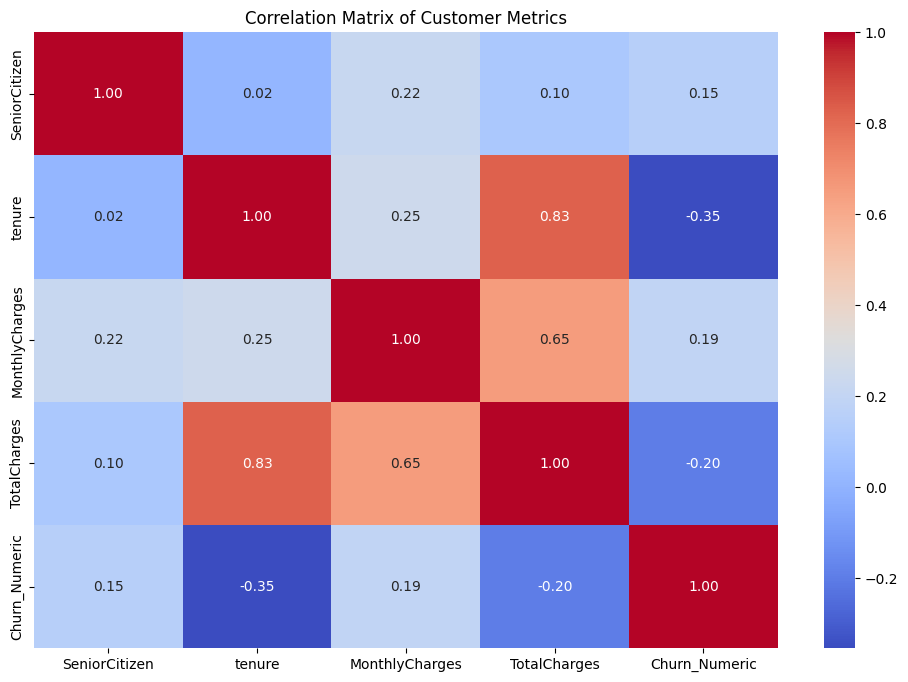

In [6]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Customer Metrics')
plt.show()

Task 2: Strategic Insights & Retention Plan
1. The "First Impression" Crisis

Insight: Our analysis shows a massive churn spike in the first 6 months of tenure.

Recommendation: Implement a "New Customer Success" program. Offering a discount or a check-in call at the 3-month mark could significantly improve the chances of a customer reaching the 1-year mark.

2. The "Fiber Optic" Quality Issue

Insight: Fiber Optic customers are leaving at a much higher rate than DSL users, despite paying more.

Recommendation: This suggests a service-price mismatch. We should conduct a technical audit of Fiber Optic stability in high-churn regions or offer a "Price Lock" for 24 months to Fiber users to encourage loyalty.

3. The Contract Conversion Strategy

Insight: Month-to-month contracts are the primary "leaks" in our revenue.

Recommendation: Launch an incentive campaign to migrate month-to-month users to One-Year Contracts. Even a small 5-10% discount for signing a yearly commitment would drastically reduce the overall churn rate from the current 26.58%.

4. The "Safety" of Bundling

Insight: Customers with "No Internet" (Phone-only) are our most loyal segment.

Recommendation: Use these loyal customers as a base for low-risk upselling. Offer them a "Basic Internet" bundle that mimics the stability of their phone line to increase their Lifetime Value (LTV) without scaring them away with high-churn Fiber plans.